In [12]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import numpy as np
import scipy.sparse as scps
import scipy.sparse.linalg as ssl
import math

In [36]:
def maillage(n):
#
# Une discretisation possible d'une EDP elliptique sur le domaine ]0,1[ x ]0,1[
# Le carre [0,1]x[0,1] est maille uniquement avec des triangles; 
# Les conditions limites sont de type Dirichlet uniquement   => neumann  =[];
#
# Entrees :
# n : nombre de points par cote du care => Npts points de discretisation au
# total
#
# Sorties :
# coordinates : matrice a deux colonnes. Chaque ligne contient les 
# coordonnes 2D d'un des points de la discretisation. Ces sommets seront 
# identifies a l'indice de la ligne correspondante dans la matrice
# coordinates.
# elements3 : matrice a trois colonnes. Chaque ligne contient les indices 
# des sommets d'un element triangle, dans le sens antihoraire. 
# dirichlet : vecteur colonne des indices des sommets de la frontiere de
# Dirichlet.
# neumann : matrice a deux colonnes. Chaque ligne contient les indices 
# des deux sommets d'une arete de la frontiere de Neumann.
# (neumann est vide sur cet exemple)
#
##################################################################################
    h=1/(n-1)
    npoin       = n*n ; 
    nelem       = 2*(n-1)*(n-1) ;
    coordinates = np.zeros((npoin,2)); 
    elements3   = (np.zeros((nelem,3))).astype(int) ;
    neumann     = (np.zeros((2*(n-1) - 1,2))).astype(int);
    dirichlet=(np.zeros((2*(n),1))).astype(int)
    # Coordonnees et connectivites :
    e = -1 ; 
    p = -1 ;
    x=np.zeros((n+1,1))
    x[n,0]=1.
    for l in range (n+1):
        x[l,0]=l*h
    for j in range (n):
            for i in range(n):
                p = p + 1  
                coordinates[p,0] = x[i,0]  
                coordinates[p,1] = x[j,0] 
                if ((i != n-1) & (j != n-1)):
                    p1 = p
                    p2 = p1 + 1 
                    p3 = p1 + n 
                    p4 = p2 + n 
                    e = e + 1 
                    elements3[e,0] = p1 
                    elements3[e,1] = p2 
                    elements3[e,2] = p3 
                    e = e + 1
                    elements3[e,0] = p4 
                    elements3[e,1] = p3 
                    elements3[e,2] = p2
                    
    #Liste des sommets de la frontiere de Dirichlet:
    p=-1
    for j in range(n): #Bas
        p=p+1
        dirichlet[p,0] = j  
    for j in range(n*n-1,n*n-n-1,-1): #Haut
        p=p+1
        dirichlet[p,0] = j
    
    #Liste des sommets de la frontiere de Neumann:
    k = -1
    for j in range(n*2-1,n*(n-1),n): #Droite
        k=k+1
        neumann[k,0] = j
        neumann[k,1] = j + n
    for j in range(n*n-2*n,n-1,-n): #Gauche
        k=k+1
        neumann[k,0] = j
        neumann[k,1] = j + n

    return coordinates, elements3, dirichlet, neumann

In [14]:
def show_triangles(coordinates,u):
#
# Fonction d'affichage de la solution u sur le maillage defini par
# elements3, coordinates.
#
# Entrees:
# elements3 : matrice a trois colonnes contenant les elements triangles
# de la discretisation, identifies par les indices de leurs trois
# sommets.
# coordinates : matrice a deux colonnes contenant les coordonnes 2D des
# points de la discretisation.
# u : vecteur colonne de longueur egale au nombre de lignes de
# coordinates contenant les valeurs de la solution a afficher aux
# points de la discretisation.
#
# Sorties : Aucune, mais la fonction doit s'afficher dans une figure.
##########################################################################
    ax= plt.figure().add_subplot(projection='3d')
    ax.plot_trisurf(coordinates[:,0],coordinates[:,1],u,linewidth=0.2,antialiased=True)
    plt.show()

**Partie I : maillage triangulaire et conditions de Dirichlet**

In [15]:
def f1(x,y):
    return 1

def f2(x,y):
    return math.sin(2*math.pi*x) + math.sin(math.pi*y)

In [16]:
#Basis functions
#inutile car on calcule les termes de la matrice de masse à la main
def eta1(x,y):
    return 1 - x - y

def eta2(x,y):
    return x

def eta3(x,y):
    return y

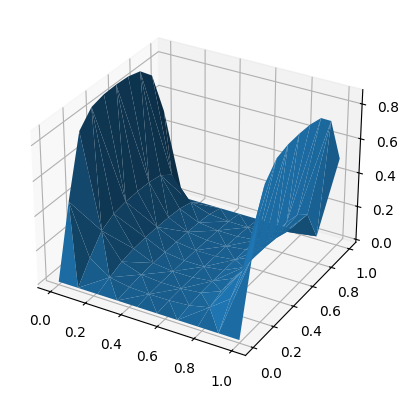

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [40]:
##################### Assembly B ################

from math import sin

n = 10
coordinates, elements3, dirichlet, neumann = maillage(n)
B = np.zeros(n*n)
c_0 = 100 # on déterminine comme on veut, il est fixé au début du pb

def g(x): # On choisit g comme on veut
    return 0.1 

for e in elements3:
    
    mat = [[coordinates[e[1]][0] - coordinates[e[0]][0], coordinates[e[2]][0] - coordinates[e[0]][0]],[coordinates[e[1]][1] - coordinates[e[1]][1], coordinates[e[2]][1] - coordinates[e[0]][1]]]
    alpha = np.linalg.det(mat)

    x_g = (coordinates[e[0]][0] + coordinates[e[1]][0] + coordinates[e[2]][0])/3
    y_g = (coordinates[e[0]][1] + coordinates[e[1]][1] + coordinates[e[2]][1])/3
    
    b_local = (alpha/6) * f1(x_g, y_g)
    
    for k in range(3):
       B[e[k]] += b_local

#print(B)


##################### Assembly A ################

A = scps.csr_matrix((n*n,n*n)).toarray() #on construit A en tant que matrice v
M_base = [[1/12, 1/24, 1/24],
     [1/24, 1/12, 1/24],
     [1/24, 1/24, 1/12]] #calculée à la main



for e in elements3:
    
    # Assembly A_local
    # Compute alpha and T
    
    mat = [[coordinates[e[1]][0] - coordinates[e[0]][0], coordinates[e[2]][0] - coordinates[e[0]][0]],
            [coordinates[e[1]][1] - coordinates[e[0]][1], coordinates[e[2]][1] - coordinates[e[0]][1]]] #J_t dans le sujet
    alpha = np.linalg.det(mat) # det de J_t
    T = alpha / 2

    M = c_0 * alpha * np.array(M_base) #mass matrix
    A_local = np.zeros((3, 3))
    #Calculer M à la place de A_local et remplacer le gradient par les intégrales des fonctions de base
    for i in range(3):
        
        gradni = [(coordinates[e[(i + 1) % 3]][1] - coordinates[e[(i + 2) % 3]][1]) / alpha, 
                  (coordinates[e[(i + 2) % 3]][0] - coordinates[e[(i + 1) % 3]][0]) / alpha]
        # print("gradni", gradni)
        
        for j in range(3):
            gradnj = [(coordinates[e[(j + 1) % 3]][1] - coordinates[e[(j + 2) % 3]][1]) / alpha, 
                      (coordinates[e[(j + 2) % 3]][0] - coordinates[e[(j + 1) % 3]][0]) / alpha]
            # print("gradnj", gradnj)
            
            A_local[i][j] = T * (np.dot(gradnj, gradni))
            
    for i in range(3):
        for j in range(3):
            A[e[i]][e[j]] += A_local[i][j] + M[i][j] #on assemble la matrice de rigidité
                   
    
#application des conditions de Dirichlet
for d in dirichlet:
    A[d, :] = 0
    A[d,d] = 1
    B[d] = 0


#application des conditions de Neumann
for n in neumann:
    G = (n[0] + n[1])/2
    contrib = g(G) * abs(n[1] - n[0]) / 2
    B[n[0]] += contrib
    B[n[1]] += contrib
    

solution = ssl.spsolve(scps.csr_matrix(A), B)

show_triangles(coordinates, solution)
print 


**Partie I bis : maillage carré**

In [18]:
def maillage_quad(n):
# 
# Une discretisation possible d'une EDP elliptique sur le domaine ]0,1[ x ]0,1[
# Le carre [0,1]x[0,1] est maille uniquement avec des quadrilatères.
# Les conditions limites sont de type Dirichlet uniquement   => neumann  =[];
#   
# Entrees :
# n : nombre de points par cote du carre => Npts points de discretisation au
# total
#  
# Sorties :es :es :
# coordinates : matrice a deux colonnes. Chaque ligne contient les
# coordonnes 2D d'un des points de la discretisation. Ces sommets seront
# identifies a l'indice de la ligne correspondante dans la matricericerice
# coordinates.
# elements4 : matrice a quatre colonnes. Chaque ligne contient les indices 
# des sommets d'un element quadrilatère, dans le sens antihoraire 
# dirichlet : vecteur colonne des indices des sommets de la frontiere de
# Dirichlet
# neumann : matrice a deux colonnes. Chaque ligne contient les indices 
# des deux sommets d'une arete de la frontiere de Neumann.
# (neumann est vide sur cet exemple)
#
##################################################################################
    h = 1 / (n - 1)
    npoin = n * n
    nelem = (n - 1) * (n - 1)
    coordinates = np.zeros((npoin, 2))
    elements4 = np.zeros((nelem, 4), dtype=int)
    neumann = []
    dirichlet = np.zeros((4 * n , 1), dtype=int)

    # Coordonnees et connectivites :
    p = -1
    for j in range(n):
        for i in range(n):
            p += 1
            coordinates[p, 0] = i * h
            coordinates[p, 1] = j * h
            if i < n - 1 and j < n - 1:
                e = j * (n - 1) + i
                p1 = j * n + i
                p2 = p1 + 1
                p3 = p1 + n
                p4 = p3 + 1
                elements4[e, :] = [p1, p2, p4, p3]

    # Liste des sommets de la frontiere de Dirichlet:
    p = -1
    for i in range(n):  # Bas
        p += 1
        dirichlet[p, 0] = i
    for i in range(n - 1, n * n, n):  # Droite
        p += 1
        dirichlet[p, 0] = i
    for i in range(n * n - 1, n * n - n - 1, -1):  # Haut
        p += 1
        dirichlet[p, 0] = i
    for i in range(n * (n - 1), -1, -n):  # Gauche
        p += 1
        dirichlet[p, 0] = i

    return coordinates, elements4, dirichlet, neumann


In [19]:
def show_quad(coordinates,u):
#
# Fonction d'affichage de la solution u sur le maillage defini par
# elements4, coordinates.
#
# Entrees:
# elements4 : matrice a trois colonnes contenant les elements triangles
# de la discretisation, identifies par les indices de leurs trois
# sommets.
# coordinates : matrice a deux colonnes contenant les coordonnes 2D des
# points de la discretisation.
# u : vecteur colonne de longueur egale au nombre de lignes de
# coordinates contenant les valeurs de la solution a afficher aux
# points de la discretisation.
#
# Sorties : Aucune, mais la fonction doit s'afficher dans une figure.
##########################################################################

    n = int(np.sqrt(len(coordinates))) - 1
    X = coordinates[:, 0].reshape(n + 1, n + 1)
    Y = coordinates[:, 1].reshape(n + 1, n + 1)
    Z = u.reshape(n + 1, n + 1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')
    
    plt.show()

In [20]:
def f1(x,y):
    return 1

def f2(x,y):
    return math.sin(2*math.pi*x) + math.sin(math.pi*y)

solution [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00435163
 0.00529157 0.00564685 0.00573794 0.00573794 0.00564685 0.00529157
 0.00435163 0.         0.         0.00529157 0.00718024 0.00773355
 0.00792504 0.00792504 0.00773355 0.00718024 0.00529157 0.
 0.         0.00564685 0.00773355 0.00850184 0.00872831 0.00872831
 0.00850184 0.00773355 0.00564685 0.         0.         0.00573794
 0.00792504 0.00872831 0.00899404 0.00899404 0.00872831 0.00792504
 0.00573794 0.         0.         0.00573794 0.00792504 0.00872831
 0.00899404 0.00899404 0.00872831 0.00792504 0.00573794 0.
 0.         0.00564685 0.00773355 0.00850184 0.00872831 0.00872831
 0.00850184 0.00773355 0.00564685 0.         0.         0.00529157
 0.00718024 0.00773355 0.00792504 0.00792504 0.00773355 0.00718024
 0.00529157 0.         0.         0.00435163 0.00529157 0.00564685
 0.00573794 0.00573794 0.00564685 0.00529157 0.00435163 0.
 0.         0.    

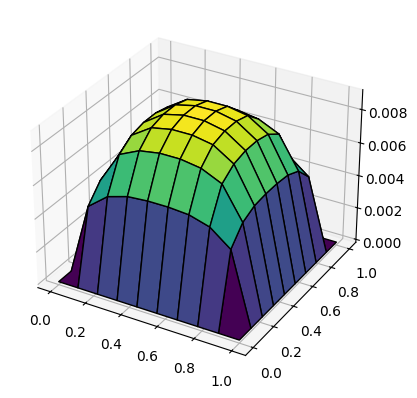

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [21]:
##################### Assembly B ################

n = 10
coordinates, elements4, dirichlet, neumann = maillage_quad(n)

B = np.zeros(n * n)
c_0 = 100  # on détermine c_0 comme on veut, il est fixé au début du pb et influe sur la solution finale

for e in elements4:
    mat = [[coordinates[e[1]][0] - coordinates[e[0]][0], coordinates[e[3]][0] - coordinates[e[0]][0]],
           [coordinates[e[1]][1] - coordinates[e[0]][1], coordinates[e[3]][1] - coordinates[e[0]][1]]]
    alpha = np.linalg.det(mat)

    x_g = (coordinates[e[0]][0] + coordinates[e[1]][0] + coordinates[e[2]][0] + coordinates[e[3]][0]) / 4
    y_g = (coordinates[e[0]][1] + coordinates[e[1]][1] + coordinates[e[2]][1] + coordinates[e[3]][1]) / 4

    b_local = (alpha / 6) * f1(x_g, y_g)

    for k in range(4):
        B[e[k]] += b_local

#print(B)


##################### Assembly A ################

A = scps.csr_matrix((n*n,n*n)).toarray() #on construit A en tant que matrice v

M_base = [[19/180, 2/45, 1/72, 2/45],
          [2/45, 19/180, 1/90, 1/72],
          [1/72, 1/90, 19/180, 1/90],
          [2/45, 1/72, 1/90, 19/180]] #calculée à la main

# Compute alpha and T
    
mat = [[coordinates[e[1]][0] - coordinates[e[0]][0], coordinates[e[3]][0] - coordinates[e[0]][0]],
        [coordinates[e[1]][1] - coordinates[e[0]][1], coordinates[e[3]][1] - coordinates[e[0]][1]]] #J_t dans le sujet
alpha = np.linalg.det(mat) # det de J_t
T = alpha / 2

M = c_0 * alpha * np.array(M_base) #mass matrix

for e in elements4:
    
    # Assembly A_local
    # Compute alpha and T
    
    mat = [[coordinates[e[1]][0] - coordinates[e[0]][0], coordinates[e[3]][0] - coordinates[e[0]][0]],
            [coordinates[e[1]][1] - coordinates[e[0]][1], coordinates[e[3]][1] - coordinates[e[0]][1]]] #J_t dans le sujet
    alpha = np.linalg.det(mat) # det de J_t
    T = alpha / 2

    M = c_0 * alpha * np.array(M_base) #mass matrix
    A_local = np.zeros((4, 4))
    #Calculer M à la place de A_local et remplacer le gradient par les intégrales des fonctions de base
    for i in range(4):
        
        gradni = [(coordinates[e[(i + 1) % 4]][1] - coordinates[e[(i + 2) % 4]][1]) / alpha, 
                  (coordinates[e[(i + 2) % 4]][0] - coordinates[e[(i + 1) % 4]][0]) / alpha]
        # print("gradni", gradni)
        
        for j in range(4):
            gradnj = [(coordinates[e[(j + 1) % 4]][1] - coordinates[e[(j + 2) % 4]][1]) / alpha, 
                      (coordinates[e[(j + 2) % 4]][0] - coordinates[e[(j + 1) % 4]][0]) / alpha]
            # print("gradnj", gradnj)
            
            A_local[i][j] = T * (np.dot(gradnj, gradni))
            
    for i in range(4):
        for j in range(4):
            A[e[i]][e[j]] += A_local[i][j] + M[i][j] #on assemble la matrice de rigidité
                   

# Application des conditions de Dirichlet
for d in dirichlet:
    A[d, :] = 0
    A[d, d] = 1
    B[d] = 0

solution = ssl.spsolve(scps.csr_matrix(A), B)
print("solution", solution)
show_quad(coordinates, solution)
print 



**Partie II : maillage mixte et ajoût des conditions de Neumann**

In [22]:
############################# Maillage mixte ################
e3=np.array([[1,2,12],[2,3,12],[3,4,14],[4,5,14],[2,15,3],[3,15,4]]).astype(int)
e4=np.array([[0,1,12,11],[11,12,13,10],[12,3,14,13],[10,13,8,9],[13,14,7,8],[14,5,6,7]]).astype(int)
dds=np.array([2,15,4,6,7,8,9,10,11,0]).astype(int)
nns=np.array([[4,5],[5,6],[0,1],[1,2]]).astype(int)
ccs=np.array([[0.,0.],[0.33333333333333,0],[0.53333333333333,0.],
                      [0.66666666666667,0.33333333333333],[1.,0.47],[1,0.66666666666667],
                     [1.,1.],[0.66666666666667,1.],[0.33333333333333,1.], [0.,1.],
                     [0.,0.66666666666667],[0.,0.33333333333333],[0.33333333333333,0.33333333333333],
                     [0.33333333333333,0.66666666666667],[0.66666666666667,0.66666666666667],[1.,0.]])

**Compléments  :  un nouveau terme dans l'EDP**